In [1]:
%matplotlib inline
import os
from cisclient.client import CISClient
from cisvis.spectra import generate_similarity_plot, generate_spectra_plot, to_dataframe, generate_histogram_intensity, \
    generate_histogram_accurate_mass, generate_histogram_ri

import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [12, 5]


In [2]:
# these are parameterized over papermill
cis_url = 'https://dev-api.metabolomics.us/cis'
cis_api_token = 'rDJfRW6ilG2WooOR72AaE3NqL4m23WvY6ub4FEoS'
splash = 'splash10-0002-0090500000-53c0a0bd55cd73db3ed9'
library = 'soqe[M-H] | QExactive | test | negative'

In [3]:

client =  CISClient(cis_url, cis_api_token)
compound = client.get_compound(library=library,splash=splash)
members = list( map(lambda member: client.get_compound(library=library,splash=member),client.get_members(library=library,splash=splash)))

# Compound Generation report

Welcome to the compound generation overview report. The main purpose is to help you diagnose the generation of compounds as well as get a better understanding why it was generated in the first place.

In [4]:
to_dataframe([compound]).drop(['spectrum','ms_level','required_for_correction','inchi_key','splash','unique_mass'],axis=1)

,id,accurate_mass,target_type,matrix,method,retention_index,sample,name,precursor_mass
0,646832,663.365112,CONFIRMED_CONSENSUS,,soqe[M-H] | QExactive | test | negative,162.163492,unknown,unknown_663.3651_162.1635,663.365112


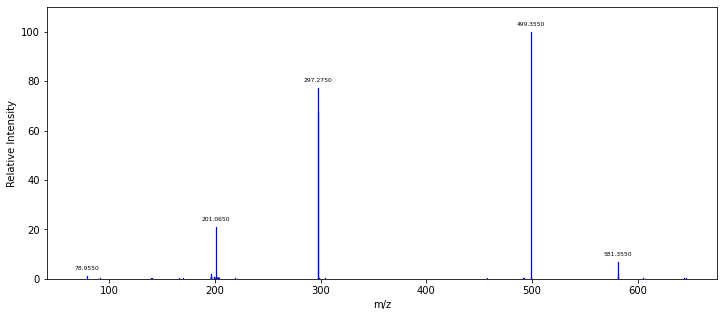

In [5]:
generate_spectra_plot(compound=compound)

This is a histogram plot of the retention index of all the members making up this compound. Please be aware that due to settings the range will never exceed these boundaeries

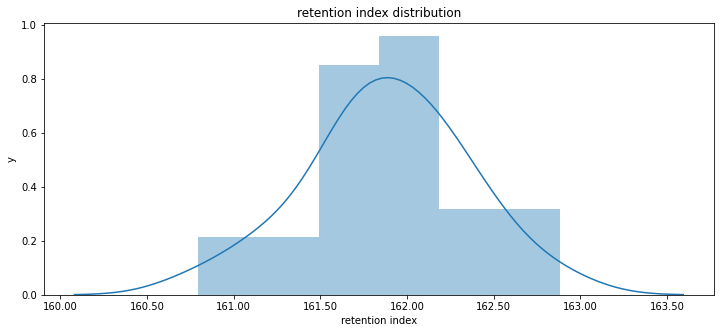

In [7]:
generate_histogram_ri(members)

This is a histogram plot of the accurate mass of all the members making up this compound. Please be aware that due to settings the range will never exceed these boundaeries

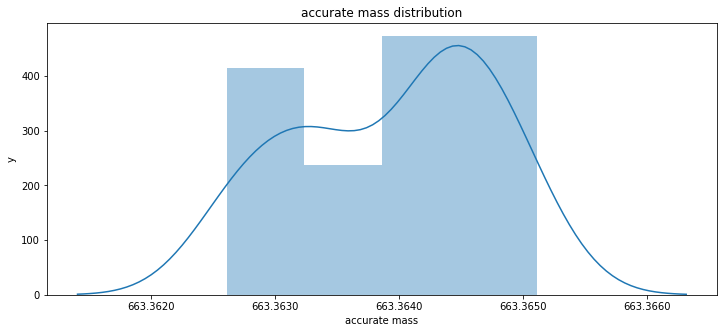

In [8]:
generate_histogram_accurate_mass(members)

This is a histogram plot of the basepeak intensity of all the members making up this compound. There are no related settings which affect this, except for
for a required min intensity setting for the Pre Cursor Mass.

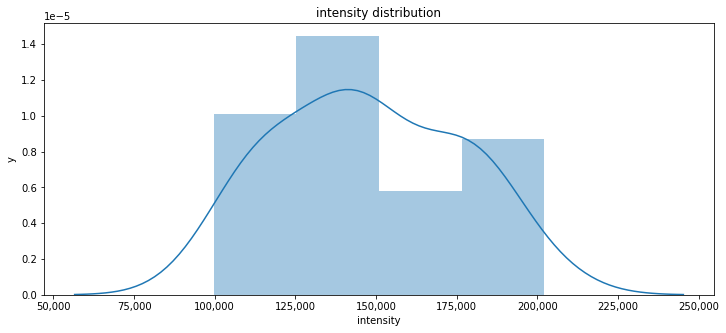

In [9]:
generate_histogram_intensity(members)

This is a tabular representation of all members of this compound, with their most important properties.

In [10]:
to_dataframe(members).drop(['spectrum','method','ms_level','required_for_correction','inchi_key','target_type','splash','unique_mass','name'],axis=1)


,id,accurate_mass,matrix,retention_index,sample,precursor_mass
0,620809,663.365112,,162.163492,NIH_Lip_Std_CSH_NEG_PlasmaPool_0eV_03,663.365112
1,619230,663.364990,,162.544171,NIH_Lip_Std_CSH_NEG_PlasmaPool_40eV_02,663.364990
2,594540,663.364990,,162.317640,NIH_Lip_Std_CSH_NEG_PlasmaPool_40eV_01,663.364990
3,622033,663.364746,,162.225885,NIH_Lip_Std_CSH_NEG_PlasmaPool_40eV_03,663.364746
4,622523,663.364746,,162.085554,NIH_Lip_Std_CSH_NEG_PlasmaPool_60eV_01,663.364746
5,590688,663.364746,,161.546056,NIH_Lip_Std_CSH_NEG_PlasmaPool_0eV_02,663.364746
6,562693,663.364563,,161.993531,NIH_Lip_Std_CSH_NEG_PlasmaPool_60eV_02,663.364563
7,593074,663.364502,,161.656375,NIH_Lip_Std_CSH_NEG_PlasmaPool_60eV_03,663.364502
8,552695,663.364380,,161.910678,NIH_Lip_Std_CSH_NEG_Muscle_01,663.364380
9,604095,663.364380,,161.702762,NIH_Lip_Std_CSH_NEG_Brain_03,663.364380


This plot demonstrates a similarity plot of all spectra making up this compond against each other. The purpose is mostly for diagnostics and finetuning of settings as well as discovering possible outliers.

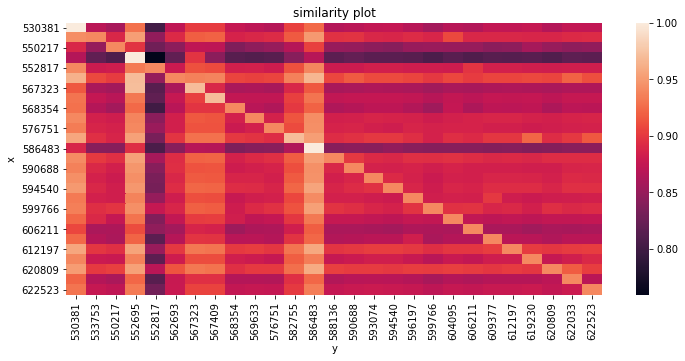

In [6]:
generate_similarity_plot(members)